# 1. Data Preprocessing

In [4]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [5]:
with open("C:\\Users\yubra\PycharmProjects\Major Project -NIDS\Dataset\kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

### Appending column names to dataset and adding new column name `Target` to dataset 

In [6]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""
  
columns = []
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


### Reading `training_attack_types` File

In [7]:
with open("C:\\Users\\yubra\\PycharmProjects\\Major Project -NIDS\\Dataset\\training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




### Creating dictionary of attacks

In [8]:

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

### Reading dataset `kddcup.data_10_percent.gz` and adding 'Attack Type' feature in training dataset. Attack types are :
* normal
* dos
* u2r
* r2l
* probe

In [9]:
path = "C:\\Users\\yubra\\PycharmProjects\\Major Project -NIDS\\Dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path, names=columns)

df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal


In [11]:
df.shape

(494021, 43)

In [12]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [13]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [14]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

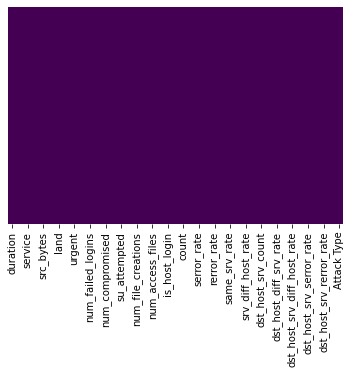

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

### No any null data found as seen on above `heatmap` as well as seen by code `df.isnull().sum()` so continuing further code

## Finding categorical features 

In [17]:
numerical_cols = df._get_numeric_data().columns

categorical_cols = list(set(df.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack Type')

categorical_cols

['protocol_type', 'flag', 'service']

### Visualizing categorical features

In [18]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind='bar')

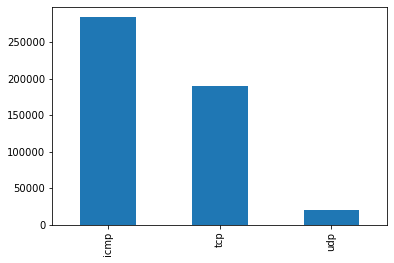

In [19]:
bar_graph('protocol_type')

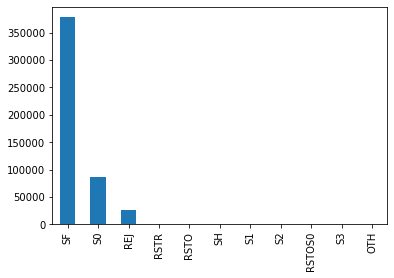

In [20]:
bar_graph('flag')

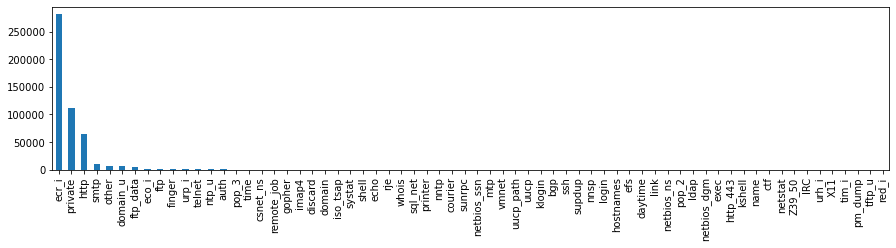

In [21]:
plt.figure(figsize=(15,3))
bar_graph('service')

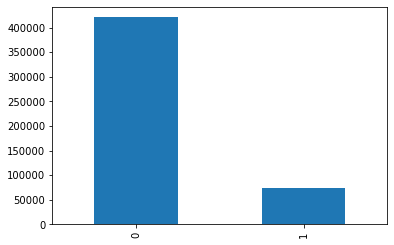

In [22]:
bar_graph('logged_in')

###  logged_in(if successfully logged in then 1 else 0). We can see that around 75000 packets have successfully logged in. 




### <span style='color:dark grey '> TARGET FEATURE DISTRIBUTION </span>

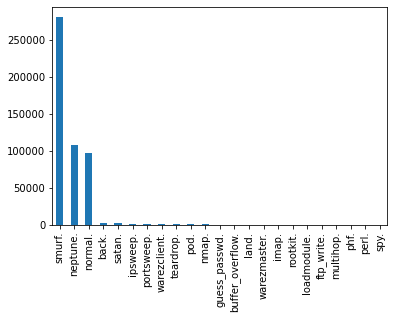

In [23]:
bar_graph('target')

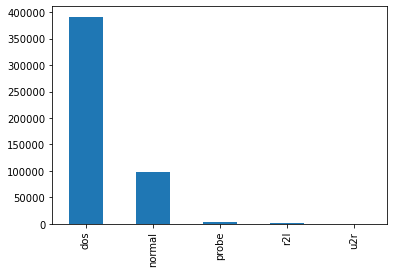

In [24]:
bar_graph('Attack Type')

## Data Correlation 

C:\Users\yubra\AppData\Local\Temp\ipykernel_10292\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


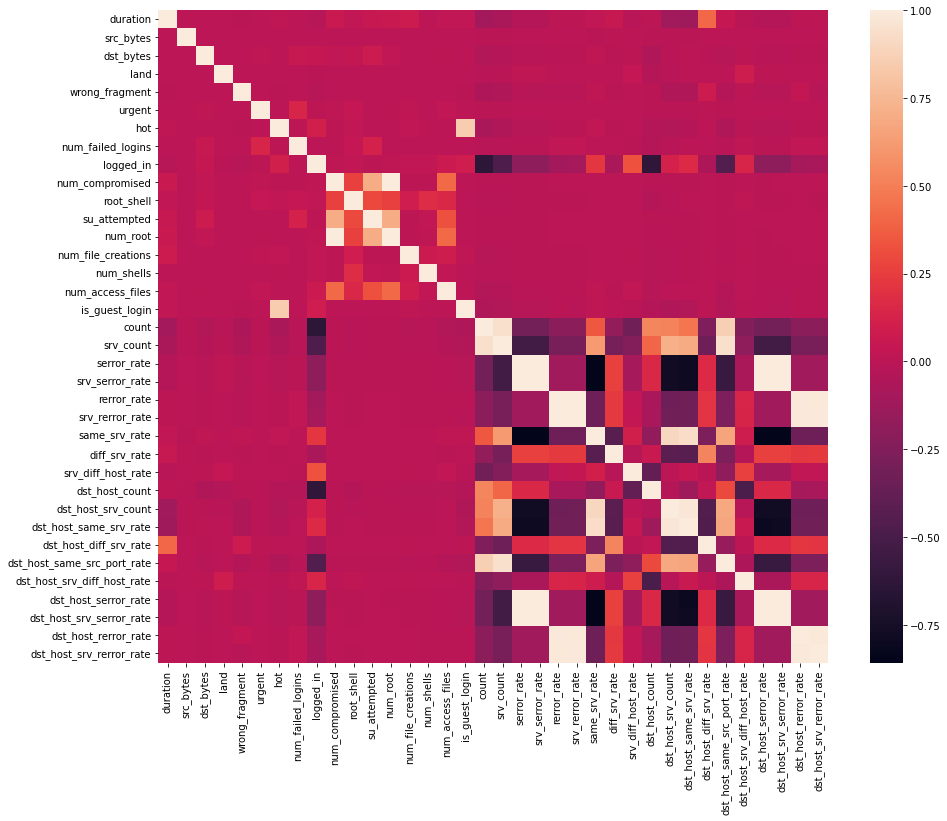

In [25]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

### Checking correlation among each feature separately that has color nearly same to that value 1 and checking that are above diagonal line

In [26]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738366

In [27]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725952

In [28]:
df['srv_count'].corr(df['count'])

0.9436670688882655

In [29]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539817937

In [30]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953983

In [31]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373309

In [32]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110298

In [33]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691242

In [34]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324209

In [35]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783333

In [36]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105015

In [37]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373975

In [38]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485680104

In [39]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850098

In [40]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956001

In [41]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308375

In [42]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751249

In [43]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845669

In [44]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [45]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [46]:
df.shape

(494021, 33)

In [47]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [48]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\yubra\AppData\Local\Temp\ipykernel_10292\1261043509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

## Feature Mapping

In [49]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [50]:
# protocol_type feature maping

pmap={'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [51]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [52]:
#flag feature mapping

fmap={'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [53]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [54]:
df.drop('service', axis=1, inplace=True)

In [55]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [56]:
df.shape

(494021, 32)

In [57]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

# 2. Modelling

## Importing libraries and splitting dataset (training and testing one)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [60]:
df = df.drop(['target', ], axis = 1)
print(df.shape)
  
# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)
  
sc = MinMaxScaler()
X = sc.fit_transform(X)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, \
                            recall_score, roc_auc_score,roc_curve

In [ ]:
# models={
#     "KNN" : KNeighborsClassifier(n_neighbors=3),
#     "Decision Tree": DecisionTreeClassifier(criterion='entropy' ,max_depth=4),
#     "Random Forest": RandomForestClassifier(n_estimators=30),
#     "SVM": SVC(gamma= 'scale'),
#     "Naive Bayes": GaussianNB(),
#     "Adaboost": AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy' ,max_depth=4), n_estimators=100, random_state=0),
#     "Logistic Regression": LogisticRegression(max_iter=1200000)
# }
# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train, y_train) #training model
    
#     #Make predictions 
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     #training set performance
#     model_train_accuracy = accuracy_score(y_train, y_test_pred)
#     model_train_precision = precision_score(y_train, y_test_pred)
#     model_train_f1score = f1_score(y_train, y_train_pred, average='weighted')
#     model_train_recall = recall_score(y_train, y_train_pred)
#     model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
#     #test set performance
#     model_test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_test_precision = precision_score(y_test, y_test_pred)
#     model_test_f1score = f1_score(y_test, y_test_pred, average='weighted')
#     model_test_recall = recall_score(y_test, y_test_pred)
#     model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
#     print(list(models.keys())[i])
    
#     print('Model performance for training set')
#     print("- Accuracy : {:.4f}".format(model_train_accuracy))
#     print("- Precision : {:.4f}".format(model_train_precision))
#     print("- F1 Score : {:.4f}".format(model_train_f1score))
#     print("- Recall : {:.4f}".format(model_train_recall))
#     print("- Roc_Auc Score : {:.4f}".format(model_train_rocauc_score))
    
    
#     print("------------------------------------------")
    
#     print('Model performance for test set')
#     print("- Accuracy : {:.4f}".format(model_test_accuracy))
#     print("- Precision : {:.4f}".format(model_test_precision))
#     print("- F1 Score : {:.4f}".format(model_test_f1score))
#     print("- Recall : {:.4f}".format(model_test_recall))
#     print("- Roc_Auc Score : {:.4f}".format(model_test_rocauc_score))
    
#     print('='*35)
#     print('\n')

### I. KNeighborClassifier

In [73]:
KNN = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
KNN.fit(X_train, y_train.values.ravel())
end_time = time.time()

print("Training Time: " , end_time-start_time)

Training Time:  0.28336334228515625


In [71]:
start_time = time.time()
y_train_pred = KNN.predict(X_train)
# y_test_pred = KNN.predict(X_test)
end_time = time.time()

print("Testing Time: ", end_time-start_time)

KeyboardInterrupt: 